# The Sign Tests

> Let X be a continuous-type random variable and let m denote the median of X. To test the hypothesis $H_{0}: m = m_{0}$ against an appropriate alternative hypothesis, we could also use a sign test. That is, if $X_{1} , X_{2} , . . . , X_{n}$ denote the observations of a random sample from this distribution, and if we let Y equal the number of neg- ative differences among $X_{1} − m_{0}, X_{2} − m_{0}, . . . , X_{n} − m_{0}$, then Y has the binomial distribution $b(n, 1/2)$ under $H_{0}$ and is the test statistic for the sign test. If Y is too large or too small, we reject H0: $m = m_{0}$.

Hogg Robert V., Tanis E.A, and Zimmerman, *Probability & Statistical Inference*, 9th ed., Pearson, 2015.

## Using Exact *p*-value

Let $X$ denote the number of seconds between two calls arrived in a specific call center and $m$ denote the median of $X$. A sample of 20 call time has been collected as follows:

(6.8,5.7,2.1,19.0,4.8,18.9,6.9,5.3,4.1,9.8,1.7,7.0,18.9,16.9,10.4,44.1,2.9,2.4,4.8,7.9)

Test the hypothesis $H_{0}: m = 6.2$ against the alternative $H_{1}: m < 6.2$.

In [2]:
n = 20
s = c(6.8,5.7,2.1,19.0,4.8,18.9,6.9,5.3,4.1,9.8,1.7,7.0,18.9,16.9,10.4,44.1,2.9,2.4,4.8,7.9)
s

[1]  6.8  5.7  2.1 19.0  4.8 18.9  6.9  5.3  4.1  9.8  1.7  7.0 18.9 16.9 10.4
[16] 44.1  2.9  2.4  4.8  7.9

### The Test Statistic
Define the random variable $Y_{i} = 1_{X_{i} - m_{0} < 0}(X_{i} - m_{0})$ and the test statistic $Y = \sum_{i=1}^{n}Y_{i}$. I follows that $Y \sim Binom(n, .5)$. The value of the test statistic of the sample is:

In [3]:
y = sum(s < 6.2)
y

[1] 9

### Plot PMF of $X \sim Binom(n, .5)$

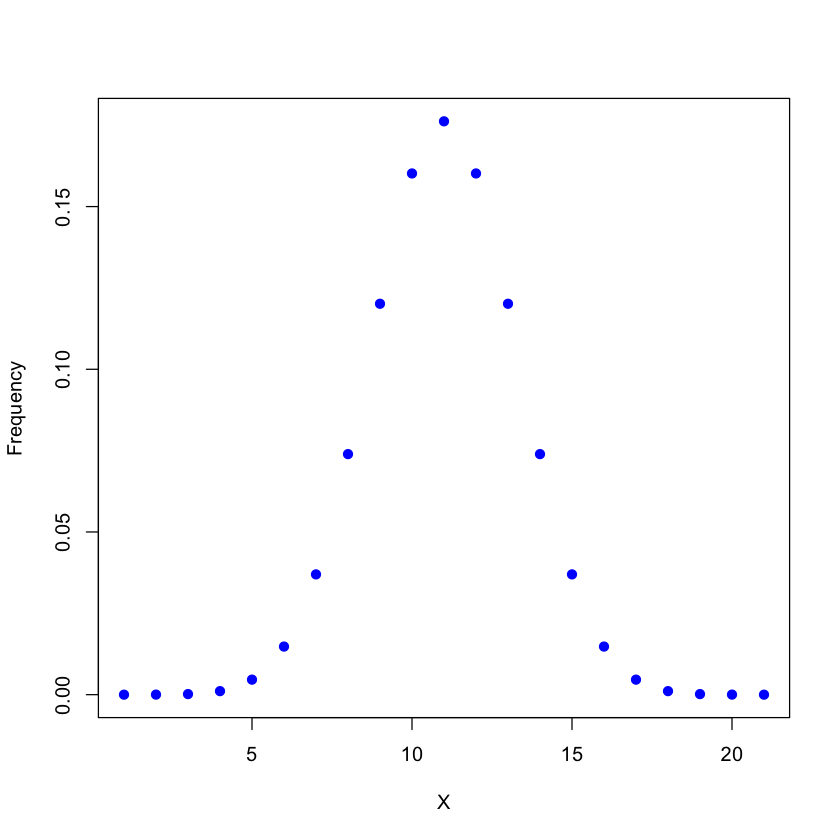

In [4]:
x=seq(0, 20)
px = dbinom(x, n, 1/2)
plot(px, pch=19, xlab='X', ylab='Frequency', col='blue')

### The *p*-Value

In [65]:
pVal = pbinom(y - 1, n, 1/2, lower.tail=F)
round(pVal, digits=4)

[1] 0.7483

Since *p*-Value is high as .7483 we do not reject the null hypothesis.

### The Critical Value

In [99]:
alphas = pbinom(seq(0, 20), 20, 1/2, lower.tail=T)
round(alphas, digits=6)
critVal = which.min(abs(alphas - .05))
paste('critVal:', critVal)
paste('alphas:', round(alphas[minIndx], digits=4))

[1] 0.000001 0.000020 0.000201 0.001288 0.005909 0.020695 0.057659 0.131588
 [9] 0.251722 0.411901 0.588099 0.748278 0.868412 0.942341 0.979305 0.994091
[17] 0.998712 0.999799 0.999980 0.999999 1.000000

[1] "critVal: 7"

[1] "alphas: 0.8684"

In [84]:
pbinom(13, n, 1/2, lower.tail=F)

[1] 0.05765915

In [94]:
seq(0, 19)

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

## Large Sample Approximation

> One stage of a manufacturing process involves a manually-controlled grinding operation. Management suspects that the grinding machine operators tend to grind parts slightly larger rather than slightly smaller than the target diameter of 0.75 inches, while still staying within specification limits. To verify their suspicion, they sample 150 within-spec parts and find that 93 have diameters above the target diameter. Is this strong evidence in support of their suspicion?

J. D. Petruccelli, B. Nandram and M. Chen, *Applied Statistics for Engineers and Scientists*, Pearson, 2014.

Let the random variable X denote the number of parts that have diameters above the median of the population (all ground parts), that we shall denote by $m$. It follows that $X \sim Binom(150, .5)$. We need to test the hypothesis $H_{0}: m = 0$ against $H_{a^{+}}: m \gt 0$.

**Note**: Because $np > 5$, we can calculate the *p*-Value of the test using the normal approximation.

### The *p*-value

In [26]:
round(pbinom(92, 150, .5, lower.tail=F), digits=4)

[1] 0.0021

In [27]:
z = (93 - 150*.5)/sqrt(150*.5*.5)
z_corrected = (93 - 150*.5 - .5)/sqrt(150*.5*.5)
round(pnorm(z, 0, 1, lower.tail=F), digits=4)
round(pnorm(z_corrected, 0, 1, lower.tail=F), digits=4)

[1] 0.0016

[1] 0.0021

Since *p*-value of .00016 (or .0021 corrected) is small we will reject the null hypothesis.

### Plot the PMF

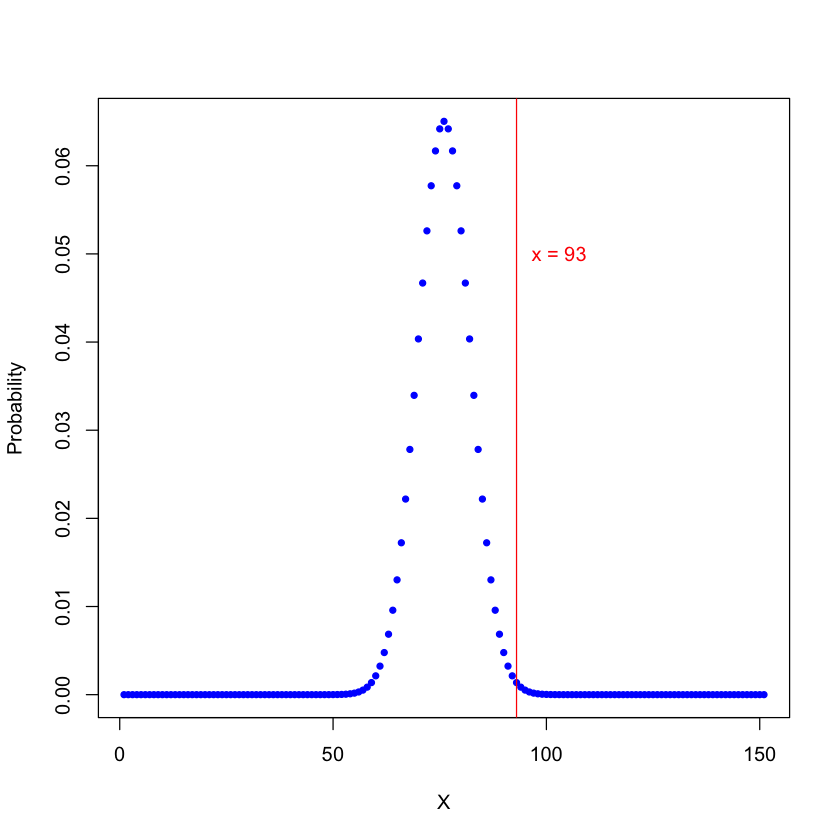

In [25]:
x = seq(0, 150)
px = dbinom(x, 150, .5)
plot(px, pch=20, col='blue', xlab='X', ylab='Probability')
abline(v=93, col='red')
text(103, .05, 'x = 93', col='red')